In [1]:
from constantProduct import ConstantProduct_swap
from token_class import Token
import matplotlib.pyplot as plt
import numpy as np

Nezavisnost putanje

In [2]:
c = ConstantProduct_swap([Token('a', 100), Token('b', 100)])

In [3]:
c.cost_function()

10000

In [4]:
c.price_function(c.getTokens()[0])

100

In [5]:
#Kupovina odjednom
round(c.swap('buy', 'a', 10), 8)

11.11111111

In [6]:
#Kupovina jedan po jedan
swap_path_idepedent = ConstantProduct_swap([Token('a', 100), Token('b', 100)])
s = 0
for i in range(10):
    pay = round(swap_path_idepedent.swap('buy', 'a', 1), 5)
    print()
    print('Korisnik placa: ', round(pay, 5))
    swap_path_idepedent.poolState()
    s += pay
print()
print('Ukupni troskovi', round(s, 4))


Korisnik placa:  1.0101
Token:
	name:  a 	amount:  99
Token:
	name:  b 	amount:  101.01010101

Korisnik placa:  1.03072
Token:
	name:  a 	amount:  98
Token:
	name:  b 	amount:  102.04081633

Korisnik placa:  1.05197
Token:
	name:  a 	amount:  97
Token:
	name:  b 	amount:  103.09278351

Korisnik placa:  1.07388
Token:
	name:  a 	amount:  96
Token:
	name:  b 	amount:  104.16666667

Korisnik placa:  1.09649
Token:
	name:  a 	amount:  95
Token:
	name:  b 	amount:  105.26315789

Korisnik placa:  1.11982
Token:
	name:  a 	amount:  94
Token:
	name:  b 	amount:  106.38297872

Korisnik placa:  1.1439
Token:
	name:  a 	amount:  93
Token:
	name:  b 	amount:  107.52688172

Korisnik placa:  1.16877
Token:
	name:  a 	amount:  92
Token:
	name:  b 	amount:  108.69565217

Korisnik placa:  1.19446
Token:
	name:  a 	amount:  91
Token:
	name:  b 	amount:  109.89010989

Korisnik placa:  1.221
Token:
	name:  a 	amount:  90
Token:
	name:  b 	amount:  111.11111111

Ukupni troskovi 11.1111


/home/tatjana/Desktop/master/AMM/V2/V3/constantProduct.py:55: RuntimeWarning: divide by zero encountered in double_scalars
  return Swap.getK(self) / n


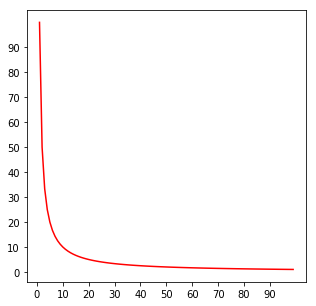

In [7]:
#Kriva vezivanja
swap_g = ConstantProduct_swap([Token('a', 10), Token('b', 10)])

x = np.arange(0, swap_g.unknownAmount(1), 1)
y = [swap_g.unknownAmount(i)  for i in x]
plt.figure(figsize=(5, 5))
plt.yticks(np.arange(0, 100, step=10))
plt.xticks(np.arange(0, 100, step=10))
plt.plot(x, y, color = 'red')
plt.savefig('constantProduct.jpeg')
plt.figure().clear()

Osetljivost na likvidnost

In [8]:
init = [50, 100, 500, 1000, 5000, 10000]

In [9]:
for i in init:
    swap_liquidity = ConstantProduct_swap([Token('a', i), Token('b', i)])
    print(i)
    print('c0 = ' ,round(swap_liquidity.cost_function(), 4))
    print('p1_0 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[0]), 4))
    print('p2_0 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[1]), 4))
    pay = swap_liquidity.swap('buy','a', 10)
    print('pay = ', round(pay, 4))
    print('p1_1 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[0]), 4))
    print('p2_1 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[1]), 4))
    
    swap_liquidity.poolState()
    print()

50
c0 =  2500
p1_0 =  50
p2_0 =  50
pay =  12.5
p1_1 =  62.5
p2_1 =  40
Token:
	name:  a 	amount:  40
Token:
	name:  b 	amount:  62.5

100
c0 =  10000
p1_0 =  100
p2_0 =  100
pay =  11.1111
p1_1 =  111.1111
p2_1 =  90
Token:
	name:  a 	amount:  90
Token:
	name:  b 	amount:  111.11111111

500
c0 =  250000
p1_0 =  500
p2_0 =  500
pay =  10.2041
p1_1 =  510.2041
p2_1 =  490
Token:
	name:  a 	amount:  490
Token:
	name:  b 	amount:  510.20408163

1000
c0 =  1000000
p1_0 =  1000
p2_0 =  1000
pay =  10.101
p1_1 =  1010.101
p2_1 =  990
Token:
	name:  a 	amount:  990
Token:
	name:  b 	amount:  1010.1010101

5000
c0 =  25000000
p1_0 =  5000
p2_0 =  5000
pay =  10.02
p1_1 =  5010.02
p2_1 =  4990
Token:
	name:  a 	amount:  4990
Token:
	name:  b 	amount:  5010.02004008

10000
c0 =  100000000
p1_0 =  10000
p2_0 =  10000
pay =  10.01
p1_1 =  10010.01
p2_1 =  9990
Token:
	name:  a 	amount:  9990
Token:
	name:  b 	amount:  10010.01001001



Nestalni gubitak

In [10]:
impLoss = ConstantProduct_swap([Token('a', 10), Token('b', 10)])

In [11]:
impLoss.impermanentLostAndGain(impLoss.getTokens()[1])

0.0

In [12]:
x = np.arange(0, impLoss.unknownAmount(1), 1)

In [13]:
impLoss.swap('buy', 'a', 9)

90.0

In [14]:
impL = [impLoss.impermanentLostAndGain(impLoss.getTokens()[1])]

In [15]:
for i in range(1, len(x)):
    print(i)
    impLoss.swap('sell', 'a', 1)
    impL.append(impLoss.impermanentLostAndGain(impLoss.getTokens()[1]))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


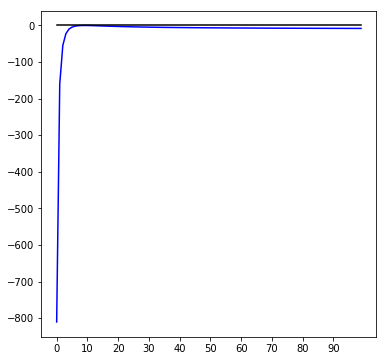

In [16]:
plt.figure(figsize=(6, 6))
plt.xticks(np.arange(0, 100, step=10))
plt.plot(x, impL, color = 'blue')
plt.plot(x, [0 for i in range (0, len(x))], color = 'black')
plt.savefig('impermanentLossCP.jpeg')
plt.figure().clear()